In [1]:
###  Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
###               to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price

In [8]:
# Import the libraries

import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
#Get the stock quote

df = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end = '2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557464
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624949
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765110
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898558
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.519089
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.688614
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.595131


In [11]:
# Get the number of rows and columns in the dataset

df.shape

(2003, 6)

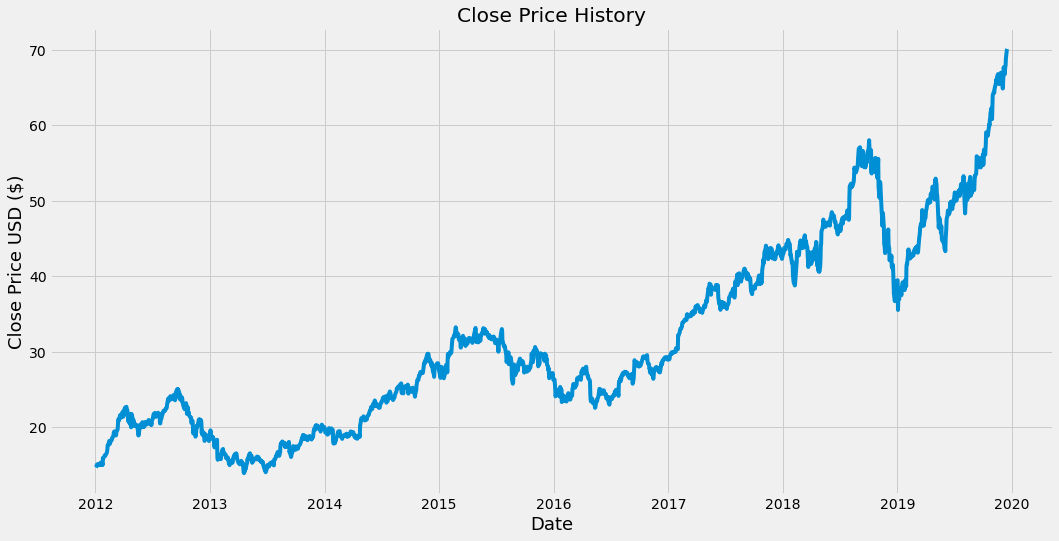

In [12]:
# Visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [16]:
# Create a new dataframe with only the 'Close' column

data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1603

In [18]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [21]:
#Create the training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into X_train and y_train dataset
X_train = []
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(X_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [22]:
#Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
#Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1543, 60, 1)

In [50]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [51]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
#Train Model

model.fit(X_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 29s 17ms/step - loss: 8.4658e-04


In [53]:
#Create the test dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60 : , :]

#Create the dataset X_test and y_test
X_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [54]:
#Convert the data numpy array
X_test = np.array(X_test)

In [55]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [56]:
#Get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 13ms/step


In [57]:
#Get the Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.1964941120147705

C:\Users\Lenovo Pc\AppData\Local\Temp\ipykernel_1204\3566582261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


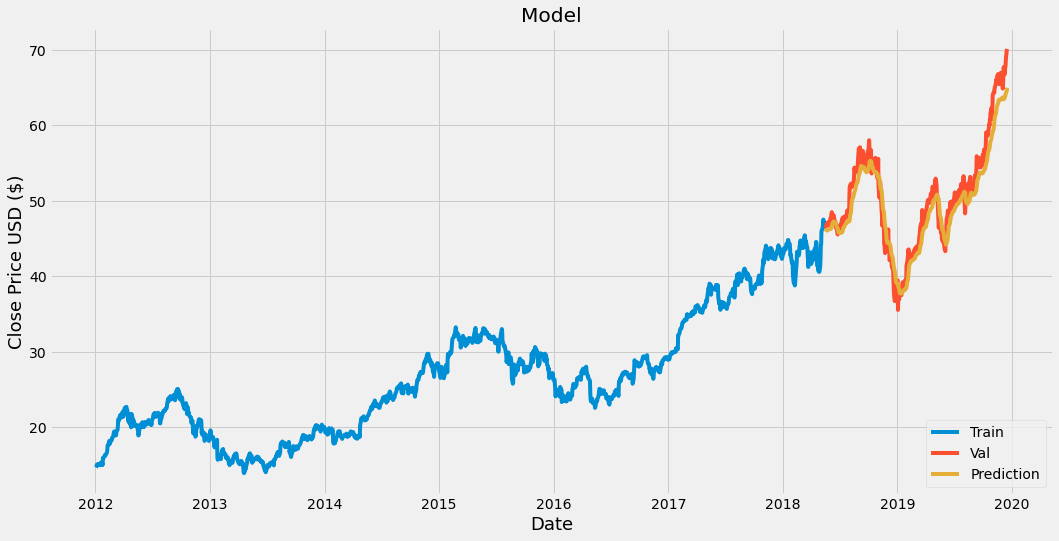

In [61]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Prediction'], loc='lower right')
plt.show()

In [62]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,45.906956
2018-05-18,46.577499,45.999577
2018-05-21,46.907501,46.032490
2018-05-22,46.790001,46.068321
2018-05-23,47.090000,46.088787
...,...,...
2019-12-11,67.692497,63.886692
2019-12-12,67.864998,64.078163
2019-12-13,68.787498,64.282173


In [65]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

#Create new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 days Closing Price and convert the dataframe to array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the last 60 days prices
X_test.append(last_60_days_scaled)

#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test_reshape = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled prices
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

1/1 [==============================] - 0s 18ms/step
[[65.379776]]


In [68]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
